# Try reading in f_H2 from the RAMSES sim output

In [55]:
import pymses
from pymses.sources.ramses import output

pymses.RamsesOutput.amr_field_descrs_by_file = \
   {"2D": {"hydro" : [ output.Scalar("rho", 0), output.Vector("vel", [1, 2, 3]),
           output.Vector("Bl", [4,5,6]), output.Vector("Br", [7,8,9]),
           output.Scalar("P", 10),output.Scalar("Z", 11)], 
            "grav"  : [ output.Vector("g", [0, 1, 2]) ]},
   "3D": {"hydro" : [ output.Scalar("rho", 0), output.Vector("vel", [1, 2, 3]),
                      output.Scalar("P_nt", 4), output.Scalar("P", 5),
                      output.Scalar("Z", 6), 
                      output.Scalar("H",8), 
                      output.Scalar("E",9), 
                      output.Scalar("H+",10), 
                      output.Scalar("HE", 11), 
                      output.Scalar("HE+",12), 
                      output.Scalar("HE++", 13), 
                      output.Scalar("H-", 14), 
                      output.Scalar("H2", 15), 
                      output.Scalar("H2+", 16)],
       "grav"  : [ output.Vector("g", [0, 1, 2]) ]}}

In [3]:
ro = pymses.RamsesOutput("output", 28)

Computing hilbert minimal domain description for output 28 ...
Done !


In [4]:
amr = ro.amr_source(["rho", "H2"])

In [5]:
ro.info

{'H0': 67.7900009155273,
 'aexp': 0.142859270653536,
 'boxlen': 1.0,
 'dom_decomp': <pymses.sources.ramses.hilbert.HilbertDomainDecomp at 0x607bfa690>,
 'dom_decomp_Hilbert_keys': array([  0.00000000e+00,   2.78507369e+15,   5.56949132e+15,
          8.31445109e+15,   9.90062483e+15,   1.10877759e+16,
          1.31167380e+16,   1.31170099e+16,   1.31170510e+16,
          1.31170643e+16,   1.31170680e+16,   1.31170689e+16,
          1.31171029e+16,   1.31172443e+16,   1.31172785e+16,
          1.31172793e+16,   1.31172793e+16,   1.39039160e+16,
          1.39043360e+16,   1.59558003e+16,   1.80143985e+16]),
 'levelmax': 17,
 'levelmin': 8,
 'ncpu': 20,
 'ndim': 3,
 'ngridmax': 10000000,
 'nstep_coarse': 3040,
 'omega_b': 0.0450000017881393,
 'omega_k': 2.98023223876953e-08,
 'omega_l': 0.691999971866608,
 'omega_m': 0.30799999833107,
 'ordering': 'hilbert',
 'time': -5.42775606861807,
 'unit_density': (9.12671643381e-25 m^-3.kg),
 'unit_length': (1.29814589144e+23 m),
 'unit_mag': (1.4

In [65]:
from pymses.utils import constants as C
print ro.info['unit_length'].express(C.Mpc)

4.20700511246


## Just going to assume it's a galactic disk for now

In [7]:
!cat output/output_00028/*csv

In [8]:
# in box unit
center = [0.53103, 0.51031000000000004, 0.50402000000000002]
gal_radius = 0.0015
print gal_radius * ro.info['unit_length'].express(C.kpc)

gal_thickn = gal_radius/2.
gal_normal = [0.10255487134299716, 0.059509123032244614, 0.99294569974382518]

6.31050766869


# random sampling the AMR data field in a given region

In [9]:
from pymses.utils.regions import Cylinder
cyl = Cylinder(center, gal_normal, gal_radius, gal_thickn)

In [ ]:
cyl.

In [49]:
# any way we could get points without assuming some shape (e.g., cylinder) for the region?
_dum = amr.flatten()

Read and filter time : 9.39 s
Reading amr data  : output/output_00028/amr_00028.out00003
Reading amr data  : output/output_00028/amr_00028.out00001
Reading amr data  : output/output_00028/amr_00028.out00002
Reading amr data  : output/output_00028/amr_00028.out00004
Reading hydro     : output/output_00028/hydro_00028.out00003Reading hydro     : output/output_00028/hydro_00028.out00001Reading hydro     : output/output_00028/hydro_00028.out00002Reading hydro     : output/output_00028/hydro_00028.out00004



Reading amr data  : output/output_00028/amr_00028.out00007Reading amr data  : output/output_00028/amr_00028.out00005Reading amr data  : output/output_00028/amr_00028.out00006Reading amr data  : output/output_00028/amr_00028.out00008



Reading hydro     : output/output_00028/hydro_00028.out00007Reading hydro     : output/output_00028/hydro_00028.out00005Reading hydro     : output/output_00028/hydro_00028.out00006Reading hydro     : output/output_00028/hydro_00028.out00008



Reading am

AttributeError: 'RamsesOctreeDataset' object has no attribute 'concatenate'

## generation of an array of 1E6 random points uniformaly spread w/in the cylinder, then sample the AMR field at these coord

In [11]:
cyl.random_points?

In [10]:
import numpy as np
from pymses.analysis import sample_points

points = cyl.random_points(int(1e6))
point_dset = sample_points(amr, points)

# print _dum = points.flatten()
# print _dum.view()
# print _dum.shape
# del _dum

Reading amr data  : output/output_00028/amr_00028.out00009
Reading hydro     : output/output_00028/hydro_00028.out00009
Reading amr data  : output/output_00028/amr_00028.out00010
Reading hydro     : output/output_00028/hydro_00028.out00010
Reading amr data  : output/output_00028/amr_00028.out00011
Reading hydro     : output/output_00028/hydro_00028.out00011
Reading amr data  : output/output_00028/amr_00028.out00012
Reading hydro     : output/output_00028/hydro_00028.out00012
Reading amr data  : output/output_00028/amr_00028.out00014
Reading hydro     : output/output_00028/hydro_00028.out00014
Reading amr data  : output/output_00028/amr_00028.out00015
Reading hydro     : output/output_00028/hydro_00028.out00015
Reading amr data  : output/output_00028/amr_00028.out00016
Reading hydro     : output/output_00028/hydro_00028.out00016
Reading amr data  : output/output_00028/amr_00028.out00017
Reading hydro     : output/output_00028/hydro_00028.out00017


/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:162: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if big_scalars_array == None:


In [11]:
point_dset.points

array([[ 0.53058606,  0.51128968,  0.50423441],
       [ 0.53065209,  0.51081686,  0.50403364],
       [ 0.53093441,  0.51007824,  0.50404259],
       ..., 
       [ 0.53174379,  0.50927836,  0.50383068],
       [ 0.52963273,  0.51054407,  0.50424717],
       [ 0.53169831,  0.50912143,  0.50369366]])

In [12]:
point_dset['rho']

array([ 174.14254722,   28.37378481,  636.31609601, ...,   90.45426635,
          3.80171194,   11.81866093])

In [13]:
import numpy as np
rho_weight_func = lambda dset: dset['rho']
r_bins = np.linspace(0, gal_radius, 200)          # 200 linearly spaced radial bins w/in cylinder radius

In [14]:
from pymses.analysis import bin_cylindrical

rho_profile = bin_cylindrical(point_dset, center, gal_normal, rho_weight_func, r_bins, divide_by_counts=True)  
# True becuase we're averaging the density field in each shell

In [15]:
%matplotlib inline

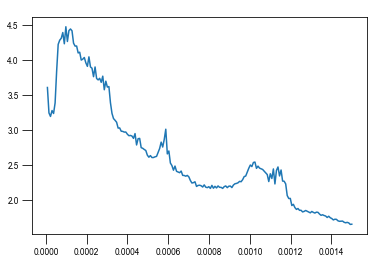

In [16]:
import pylab as plt
plt.plot(r_bins[1:], np.log10(rho_profile))

Text(0.5,0,'r (code unit)')

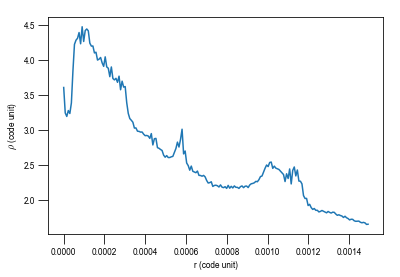

In [17]:
plt.plot(r_bins[:-1], np.log10(rho_profile))
plt.ylabel(r'$\rho$ (code unit)')
plt.xlabel('r (code unit)')

In [19]:
# ['H2'] is probably f_H2
print point_dset['H2'].min()
print point_dset['H2'].max()

0.0
0.112432799466


# Repeat for H2 density

Text(0.5,0,'r (kpc)')

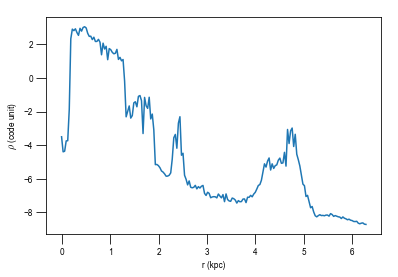

In [20]:
import numpy as np
rho_weight_func = lambda dset: dset['H2'] * dset['rho']

rho_profile = bin_cylindrical(point_dset, center, gal_normal, rho_weight_func, r_bins, divide_by_counts=True)  
# True becuase we're averaging the density field in each shell

plt.plot(r_bins[:-1]* ro.info['unit_length'].express(C.kpc), np.log10(rho_profile))
# * ro.info["unit_density"].express(C.H_cc)
plt.ylabel(r'$\rho$ (code unit)')    
plt.xlabel('r (kpc)')

Text(0.5,0,'r (kpc)')

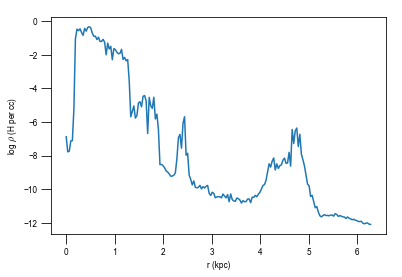

In [21]:
plt.plot(r_bins[:-1]* ro.info['unit_length'].express(C.kpc), np.log10(rho_profile * ro.info["unit_density"].express(C.H_cc)))
plt.ylabel(r'log $\rho$ (H per cc)')    
plt.xlabel('r (kpc)')

In [22]:
ro.info["unit_density"].express(C.H_cc)

0.00041784966805415413

In [41]:
C.H_cc?

# plot the H2 density map using FFT-convolve, then overplot contours

In [23]:
line_of_sight_axis = [0.85882976970482816, 0.49834986636750128, -0.11856996820546729]
up_vector = [0.10255487134299716, 0.059509123032244614, 0.99294569974382518]
region_size = [0.0015, 0.0015] 
distance = 0.00075
far_cut_depth = 0.00075
map_max_size = 256
log_sensitive = True
perspectiveAngle = 0

In [24]:
from numpy import array
from pymses.analysis.visualization import * 

# Map operator : mass-weighted density map, this section here is important!!! 
up_func = lambda dset: ((dset["rho"] * dset["H2"])**2 * dset.get_sizes()**3) 
down_func = lambda dset: (dset["rho"] * dset["H2"] * dset.get_sizes()**3)
scal_func = FractionOperator(up_func, down_func)
surface_plot = False

# use Sigma_h2 (mass surface density) instead of mass-weighted density
mass_h2 = ScalarOperator(down_func)
scal_func = mass_h2
surface_plot = True

axes = {'los': line_of_sight_axis}
 
# Map processing
mp = fft_projection.MapFFTProcessor(amr, ro.info) 


cam  = Camera(center=center, line_of_sight_axis=axes['los'], region_size=region_size, distance=distance, 
             far_cut_depth=far_cut_depth, up_vector=up_vector, map_max_size=map_max_size, log_sensitive=True)
    
map = mp.process(scal_func, cam, surf_qty=surface_plot)


Processing map dict. (kernel size by kernel size 2D binning)
Reading amr data  : output/output_00028/amr_00028.out00008
Reading hydro     : output/output_00028/hydro_00028.out00008
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00009
Reading hydro     : output/output_00028/hydro_00028.out00009
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00010
Reading hydro     : output/output_00028/hydro_00028.out00010
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00011
Reading hydro     : output/output_00028/hydro_00028.out00011
npoints = 65433
Projection time = 0.006s
Level-by-level cell processing time = 0.025s
Reading amr data  : output/output_00028/amr_00028.out00012
Reading hydro     : output/output_00028/hydro_00028.out00012
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00013
Reading hydro     : output/output_00028/hydro_

/Users/admin/Research/pymses_4.0.0/pymses/analysis/visualization/camera.py:79: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if line_of_sight_axis in Camera.special_axes.keys():
/Users/admin/Research/pymses_4.0.0/pymses/analysis/visualization/camera.py:86: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if up_vector in Camera.special_axes.keys():


Process fft map total time = 6.511s
Processing FFT-convolution (4 different kernel sizes)
 -> level = 14
 -> level = 15
 -> level = 16
 -> level = 17


In [49]:
map.argmin()

7646

In [50]:
map.min()

-26132751.890069202

### Q: why is map.min() -ve?

A: prob because different precision in RAMSES versus python, overflow.. because of low density. 

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


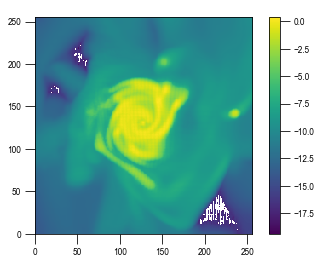

In [26]:
plt.imshow(np.log10(map))
plt.colorbar()


In [31]:
np.log10(map).min()

# nan probably due to taking log of -ve, although not clear to me why map contains -ve average density.. --> precision issues...

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


nan

#### Want to look at the gas density with the camera region, to understand why is map.min() -ve, which we believe is caused by Floating point overflow when we used the map operator because rho can be very small (w/ high floating point precision as it's output from RAMSES), then when we take the fraction, it blows up. 

In [56]:
def amr2cell(ro=None, list_var=None, log_sfera=False, camera_in={}, verbose=False):
    
    assert ro != None
    assert list_var != None

    from pymses.utils import regions
    from pymses.filters import RegionFilter, CellsToPoints

    amr = ro.amr_source(list_var)

    center = camera_in['center']
    radius = camera_in['region_size'][0]

    if(log_sfera):
        regione_sp = regions.Sphere(center, radius)
    else:
        sinistra = np.copy(center) - radius / 2
        destra = np.copy(center) + radius / 2
        regione_sp = regions.Box(sinistra, destra)

    if(verbose):
        print 'Extracting cells'
        if(log_sfera):
            print '  getting a sphere'
            print '  center:', center
            print '  radius:', radius
        else:
            print '  getting a box'
            print '  center:', center
            print '  size  :', radius

    # cut the region
    amr = RegionFilter(regione_sp, amr)
    # get everithing in the region
    amr = CellsToPoints(amr)

    celle = amr.flatten()
    amr = None

    return celle


In [57]:
cells_inside_camera = amr2cell(ro, list_var= ['rho','H2'], log_sfera= True, \
                               camera_in = {'center': center,'region_size' : region_size})


Read and filter time : 3.09 s
Reading amr data  : output/output_00028/amr_00028.out00008
Reading amr data  : output/output_00028/amr_00028.out00009
Reading amr data  : output/output_00028/amr_00028.out00010
Reading amr data  : output/output_00028/amr_00028.out00011
Reading hydro     : output/output_00028/hydro_00028.out00008Reading hydro     : output/output_00028/hydro_00028.out00009Reading hydro     : output/output_00028/hydro_00028.out00010Reading hydro     : output/output_00028/hydro_00028.out00011



Reading amr data  : output/output_00028/amr_00028.out00015Reading amr data  : output/output_00028/amr_00028.out00013Reading amr data  : output/output_00028/amr_00028.out00014Reading amr data  : output/output_00028/amr_00028.out00012



Reading hydro     : output/output_00028/hydro_00028.out00015Reading hydro     : output/output_00028/hydro_00028.out00013Reading hydro     : output/output_00028/hydro_00028.out00014Reading hydro     : output/output_00028/hydro_00028.out00012



Reading am

/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:
/Users/admin/Research/pymses_4.0.0/pymses/sources/ramses/octree.py:362: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.active_mask == None:


In [66]:
h2rho = (cells_inside_camera['rho'] * cells_inside_camera['H2']) * (ro.info['unit_density'].express(C.H_cc))

rho_cam = (cells_inside_camera['rho']) * ro.info['unit_density'].express(C.H_cc)

print h2rho.max()
print h2rho.min()

print rho_cam.max()
# ok, the density makes sense. So the -ve in map.min() is probably because of what we speculated - floating point overflow.

70.3785310502
0.0
3106.99095135


# Look using MPL and overplot contours

In [67]:
from matplotlib.colors import LogNorm

map_max_size = 256 

l = np.linspace(0, map_max_size, map_max_size)
m = np.linspace(0, map_max_size, map_max_size)

ll, mm = np.meshgrid(l, m)

In [68]:
ll.shape

(256, 256)

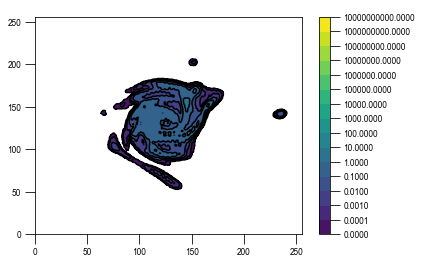

In [69]:
lvls = np.logspace(-5, 10, 16)

# plt.imshow(np.log10(map))

CF = plt.contourf(ll, mm, map, norm=LogNorm(), levels=lvls)

CS = plt.contour(ll, mm, map, norm=LogNorm(), levels=lvls, colors='k')

cbar = plt.colorbar(CF, ticks=lvls, format='%.4f')
plt.show();

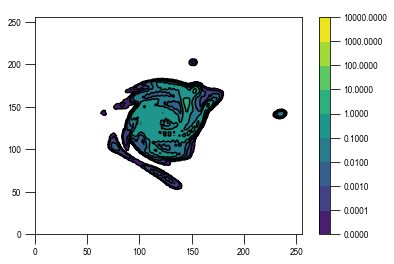

In [70]:
lvls = np.logspace(-5, 4, 10)

# plt.imshow(np.log10(map))

CF = plt.contourf(ll, mm, map, norm=LogNorm(), levels=lvls)

CS = plt.contour(ll, mm, map, norm=LogNorm(), levels=lvls, colors='k')

cbar = plt.colorbar(CF, ticks=lvls, format='%.4f')
plt.show();

### Using imshow instead of plt.contour, which we had specified to start at contour at log10 = -5 level, but plt.imshow will show the whole image


/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


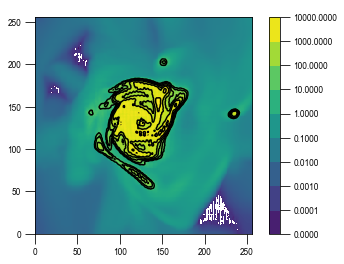

In [41]:
lvls = np.logspace(-5, 4, 10)

plt.imshow(np.log10(map))
# CF = plt.contourf(ll, mm, map, norm=LogNorm(), levels=lvls)

CS = plt.contour(ll, mm, map, norm=LogNorm(), levels=lvls, colors='k')

cbar = plt.colorbar(CF, ticks=lvls, format='%.4f')
plt.show();

In [42]:
np.log10(map.ravel())

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


array([-14.14353857, -14.04244132, -13.96682712, ...,  -9.58017848,
        -9.55441786,  -9.54125732])

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


(array([  7.00000000e+00,   8.00000000e+00,   7.60000000e+01,
          2.95000000e+02,   6.91000000e+02,   5.98000000e+02,
          8.42000000e+02,   8.20000000e+02,   1.20600000e+03,
          2.32900000e+03,   6.26300000e+03,   3.48700000e+03,
          3.89100000e+03,   8.32200000e+03,   6.82100000e+03,
          6.66200000e+03,   8.37300000e+03,   3.40000000e+03,
          1.61500000e+03,   8.31000000e+02,   5.08000000e+02,
          4.61000000e+02,   5.99000000e+02,   6.55000000e+02,
          6.93000000e+02,   6.90000000e+02,   1.03500000e+03,
          1.27400000e+03,   1.84300000e+03,   7.95000000e+02]),
 array([-19.42778867, -18.76618309, -18.10457751, -17.44297193,
        -16.78136635, -16.11976077, -15.45815519, -14.79654961,
        -14.13494402, -13.47333844, -12.81173286, -12.15012728,
        -11.4885217 , -10.82691612, -10.16531054,  -9.50370496,
         -8.84209938,  -8.1804938 ,  -7.51888822,  -6.85728264,
         -6.19567706,  -5.53407148,  -4.8724659 ,  -4.2108

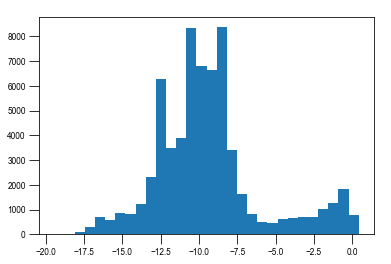

In [43]:
A = np.log10(map.ravel())
A = A[~np.isnan(A)]
plt.hist(A, bins=30)

In [71]:
lvls = np.logspace(-5, 10, 16)

# # CF = plt.imshow(np.log10(map))
# B = np.log10(map)
# B = B[~np.isnan(B)]

# replace nan's after taking log to 0.0 for imshow
C = np.log10(map)
C = np.nan_to_num(C)


/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10


In [72]:
C.shape

(256, 256)

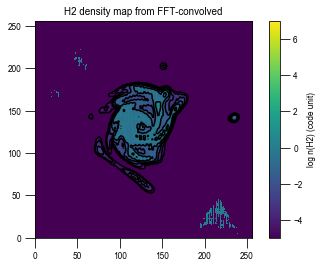

In [73]:
CF = plt.imshow(C, clim=(-5, 7))

CS = plt.contour(ll, mm, map, norm=LogNorm(), levels=lvls, colors='k')

cbar = plt.colorbar(CF)
cbar.set_label("log n(H2) or surface density depending on map operator (code unit)")

plt.title('H2 density map from FFT-convolved')

plt.show();

### Can still see so artificial "crap" due to the overflow problem. 

### try to get rid of it by applying a threshold in the map operator:
1. convert into H_cc
2. convert surface density (defined in map operator step) to Msun/pc^2 
3. apply a cut after getting map

In [76]:
# map operator: use Sigma_h2 (mass surface density) instead of mass-weighted density
down_func = lambda dset: (dset["rho"] * dset["H2"] * dset.get_sizes()**3)
mass_h2 = ScalarOperator(down_func)
scal_func = mass_h2
surface_plot = True

axes = {'los': line_of_sight_axis}
 
# Map processing
mp = fft_projection.MapFFTProcessor(amr, ro.info) 

cam  = Camera(center=center, line_of_sight_axis=axes['los'], region_size=region_size, distance=distance, 
             far_cut_depth=far_cut_depth, up_vector=up_vector, map_max_size=map_max_size, log_sensitive=True)

map = mp.process(scal_func, cam, surf_qty=surface_plot)


Processing map dict. (kernel size by kernel size 2D binning)
Reading amr data  : output/output_00028/amr_00028.out00008
Reading hydro     : output/output_00028/hydro_00028.out00008
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00009
Reading hydro     : output/output_00028/hydro_00028.out00009
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00010
Reading hydro     : output/output_00028/hydro_00028.out00010
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00011
Reading hydro     : output/output_00028/hydro_00028.out00011
npoints = 65433
Projection time = 0.008s
Level-by-level cell processing time = 0.034s
Reading amr data  : output/output_00028/amr_00028.out00012
Reading hydro     : output/output_00028/hydro_00028.out00012
No interesting point in this dataset
Reading amr data  : output/output_00028/amr_00028.out00013
Reading hydro     : output/output_00028/hydro_

In [86]:
from pymses.utils import constants as C
factor_H_cc = ro.info['unit_density'].express(C.H_cc)
factor_MsunOpc2 = (ro.info['unit_mass'] / ro.info['unit_length']**2).express(C.Msun/C.pc**2)

In [87]:
MsunOpc2 = map * factor_MsunOpc2

/Users/admin/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()


(array([  7.00000000e+00,   8.00000000e+00,   7.60000000e+01,
          2.95000000e+02,   6.91000000e+02,   5.98000000e+02,
          8.42000000e+02,   8.20000000e+02,   1.20600000e+03,
          2.32900000e+03,   6.26300000e+03,   3.48700000e+03,
          3.89100000e+03,   8.32200000e+03,   6.82100000e+03,
          6.66200000e+03,   8.37300000e+03,   3.40000000e+03,
          1.61500000e+03,   8.31000000e+02,   5.08000000e+02,
          4.61000000e+02,   5.99000000e+02,   6.55000000e+02,
          6.93000000e+02,   6.90000000e+02,   1.03500000e+03,
          1.27400000e+03,   1.84300000e+03,   7.95000000e+02]),
 array([-17.67406263, -17.01245705, -16.35085147, -15.68924589,
        -15.02764031, -14.36603473, -13.70442915, -13.04282357,
        -12.38121799, -11.7196124 , -11.05800682, -10.39640124,
         -9.73479566,  -9.07319008,  -8.4115845 ,  -7.74997892,
         -7.08837334,  -6.42676776,  -5.76516218,  -5.1035566 ,
         -4.44195102,  -3.78034544,  -3.11873986,  -2.4571

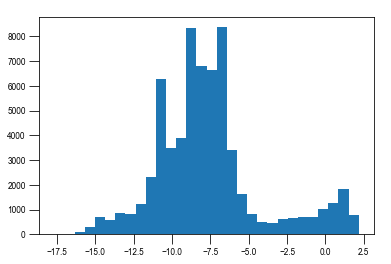

In [89]:
# before we apply thresshold, check what values of Msun/pc^2 are we getting

A = np.log10(MsunOpc2.ravel())
A = A[~np.isnan(A)]
plt.hist(A, bins=30)

### Q: why is the range of surface density not what we expect for Msun/pc^2? Perhaps I need to * unit_density when I define the map operator?


In [95]:
# determine the factor to get to Msun/pc^2 or Msun/pc^3

mH2gram = 1.6737236E-24 
gram2Msun = 1.989E33  
cm2pc = 3.0857E18

print rho_cam.max() * mH2gram * gram2Msun * (cm2pc)**3


3.03892241815e+68


### Q: did I messed something up?